# Build a Pivot Table using Pandas 

https://www.analyticsvidhya.com/blog/2020/03/pivot-table-pandas-python/?utm_source=feedburner&utm_medium=email&utm_campaign=Feed%3A+AnalyticsVidhya+%28Analytics+Vidhya%29

### Plus  
https://stackoverflow.com/questions/41383302/pivot-table-subtotals-in-pandas  
https://www.dataquest.io/blog/pandas-pivot-table/  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# already downloaded the titanic dataset - often used by AnalyticsVidhya
df = pd.read_csv('./data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# minor cleanup - to focus on pivot tables
df.drop(['PassengerId','Ticket','Name'],inplace=True,axis=1)

### How to group data using index in a pivot table?  

pivot_table requires a data and an index parameter  

- data is the Pandas dataframe you pass to the function  
- index is the feature that allows you to group your data. The index feature will appear as an index in the resultant table  

We will be using the ‘Sex’ column as the index for now:  

In [4]:
#a single index
table = pd.pivot_table(data=df,index=['Sex'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


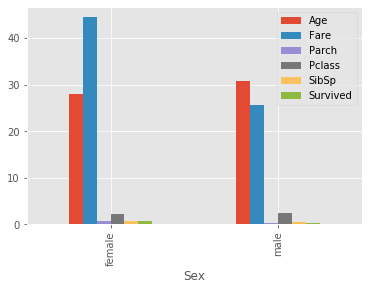

In [6]:
# plot ...
table.plot(kind='bar');

### Multi-Index  

In [7]:
#multiple indexes
table = pd.pivot_table(df,index=['Sex','Pclass'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

### Different aggregation function for different features  

In [9]:
#different aggregate functions
table = pd.pivot_table(df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

### Aggregate on specific features with values parameter 

In [10]:
table = pd.pivot_table(df,index=['Sex','Pclass'],values=['Survived'], aggfunc=np.sum)
table

Survived
Sex    Pclass          
female 1             91
       2             70
       3             72
male   1             45
       2             17
       3             47

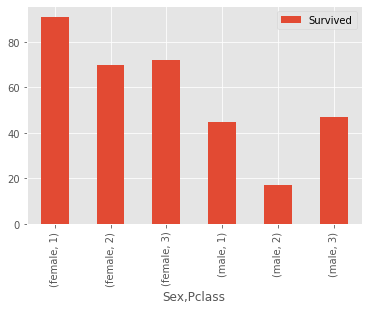

In [11]:
table.plot(kind='bar');

### Find the relationship between features with columns parameter 

In [12]:
#columns
table = pd.pivot_table(df,index=['Sex'],columns=['Pclass'],values=['Survived'],aggfunc=np.sum)
table

Survived        
Pclass        1   2   3
Sex                    
female       91  70  72
male         45  17  47

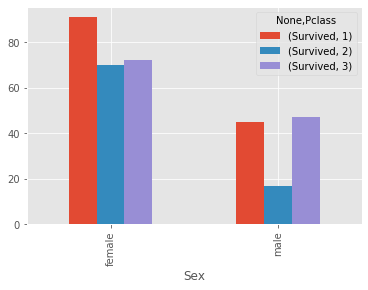

In [13]:
table.plot(kind='bar');

### Handling missing data  

In [15]:
#display null values
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean)
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000        NaN  13.500000
                2             NaN        NaN  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500        NaN  36.121667
                2        1.000000        NaN  17.095000
                3       18.488571  29.000000  22.933333

In [34]:
#handling null values 
# - giving NaN a value ... of the mean
table = pd.pivot_table(df,index=['Sex','Survived','Pclass'],columns=['Embarked'],values=['Age'],aggfunc=np.mean,fill_value=np.mean(df['Age']))
table

Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
male   0        1       43.050000  44.000000  45.362500
                2       29.500000  57.000000  33.414474
                3       27.555556  28.076923  27.168478
       1        1       36.437500  29.699118  36.121667
                2        1.000000  29.699118  17.095000
                3       18.488571  29.000000  22.933333

## Additional features  
- found on other sites .... 

###  subtotals .... from StackOverflow  
 - adjusting for above dataset  

In [45]:
#seeing what below does
for k, d in table.groupby(level=0):
    print("LOOP")
    print(type(k), type(d))
    print("k", k)
    print("d", d)
    #print(k,d)

LOOP
<class 'str'> <class 'pandas.core.frame.DataFrame'>
k female
d                               Age                      
Embarked                        C          Q          S
Sex    Survived Pclass                                 
female 0        1       50.000000  29.699118  13.500000
                2       29.699118  29.699118  36.000000
                3       20.700000  28.100000  23.688889
       1        1       35.675676  33.000000  33.619048
                2       19.142857  30.000000  29.091667
                3       11.045455  17.600000  22.548387
LOOP
<class 'str'> <class 'pandas.core.frame.DataFrame'>
k male
d                             Age                      
Embarked                      C          Q          S
Sex  Survived Pclass                                 
male 0        1       43.050000  44.000000  45.362500
              2       29.500000  57.000000  33.414474
              3       27.555556  28.076923  27.168478
     1        1       36.437500  29.69

In [35]:
table2 = pd.concat([
    d.append(d.sum().rename((k, 'Total')))
    for k, d in table.groupby(level=0)
]).append(table.sum().rename(('Grand', 'Total')))

table2

Age                        
Embarked                  C           Q           S
(female, 0, 1)    50.000000   29.699118   13.500000
(female, 0, 2)    29.699118   29.699118   36.000000
(female, 0, 3)    20.700000   28.100000   23.688889
(female, 1, 1)    35.675676   33.000000   33.619048
(female, 1, 2)    19.142857   30.000000   29.091667
(female, 1, 3)    11.045455   17.600000   22.548387
(female, Total)  166.263105  168.098235  158.447990
(male, 0, 1)      43.050000   44.000000   45.362500
(male, 0, 2)      29.500000   57.000000   33.414474
(male, 0, 3)      27.555556   28.076923   27.168478
(male, 1, 1)      36.437500   29.699118   36.121667
(male, 1, 2)       1.000000   29.699118   17.095000
(male, 1, 3)      18.488571   29.000000   22.933333
(male, Total)    156.031627  217.475158  182.095452
(Grand, Total)   322.294732  385.573394  340.543442